In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from os import system

In [116]:
def get_data(size: tuple[int, int] = (1, 100)) -> pd.DataFrame:
    system(f'm1.exe -i {size[1]} -n {size[0]} -f tmp/res')

    d = pd.DataFrame(np.fromfile('tmp/res.binary', dtype=np.int32).reshape(size).T)

    system('del tmp/res.binary')
    return d

def cmean(d: pd.DataFrame) -> pd.DataFrame:
    return pd.DataFrame(
        [d.loc[i].mean() \
        for i in d.index],
        columns=['x']
    )

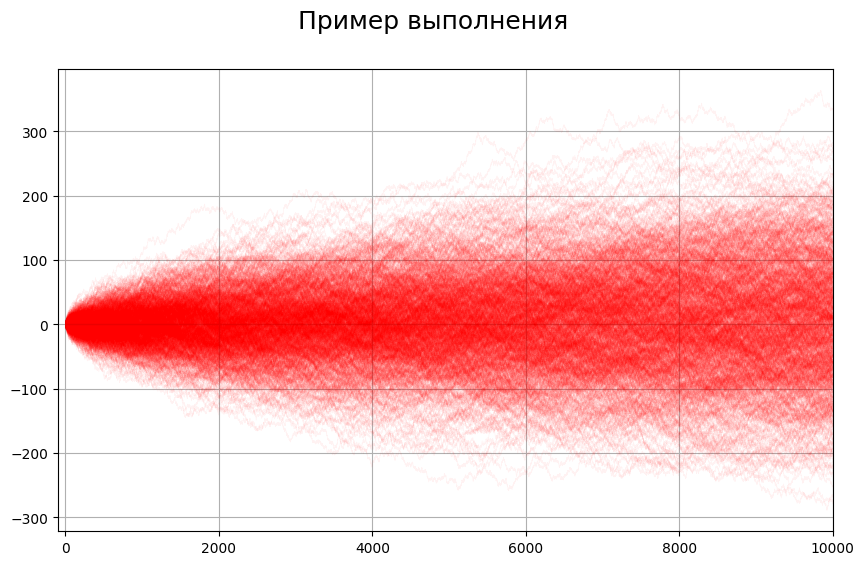

In [81]:
d = get_data(size=(1000, 10000))

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Пример выполнения', fontsize=18)

for f in d.columns:
    ax.plot(d.index, d[f], c='red', linewidth=.5, alpha=.05)

ax.set_xlim(-100, 10000)
ax.grid(True)
plt.show()

## Простые статистики

### Среднее отклонение

In [107]:
sizes = [
    (10, 10000),
    (100, 10000),
    (1000, 10000),
    (10000, 10000),
    (100000, 10000)
]
data = [cmean(get_data(s)) for s in sizes]

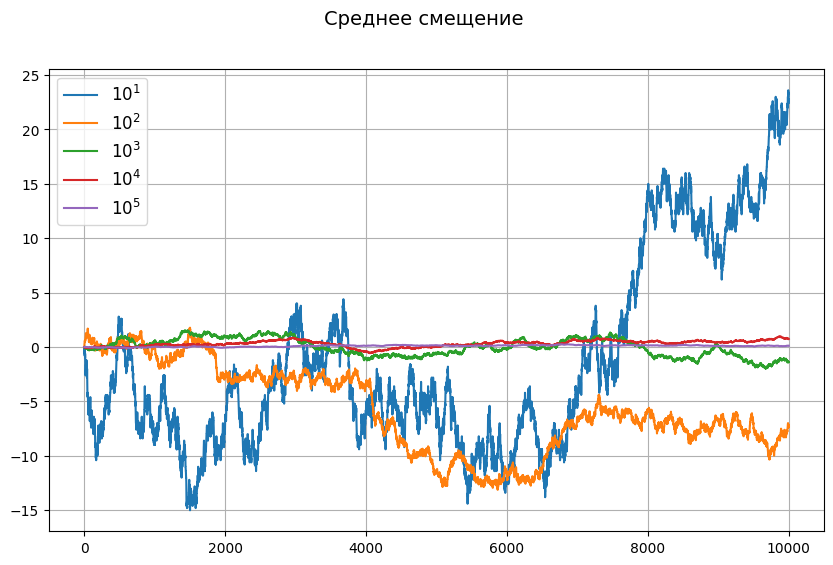

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Среднее смещение', fontsize=14)

for d, s in zip(data, sizes):
    ax.plot(d.index, d.x, label=f'$10^{np.log10(s[0]):.0f}$')

ax.legend(loc='best', fontsize=12)
ax.grid(True)
plt.show()

### Средний модуль смещения

In [109]:
sizes = [
    (10, 10000),
    (100, 10000),
    (1000, 10000),
    (10000, 10000)
]
data = [cmean(get_data(s).abs()) for s in sizes]

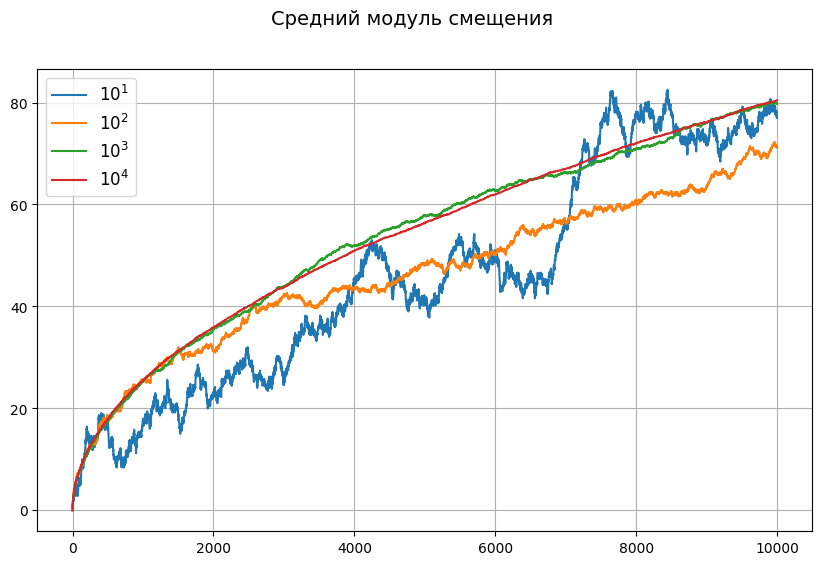

In [110]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Средний модуль смещения', fontsize=14)

for d, s in zip(data, sizes):
    ax.plot(d.index, d.x, label=f'$10^{np.log10(s[0]):.0f}$')

ax.legend(loc='best', fontsize=12)
ax.grid(True)
plt.show()

### Средний квадрат смещения

In [111]:
sizes = [
    (10, 10000),
    (100, 10000),
    (1000, 10000),
    (10000, 10000)
]
data = [cmean(get_data(s) ** 2) for s in sizes]

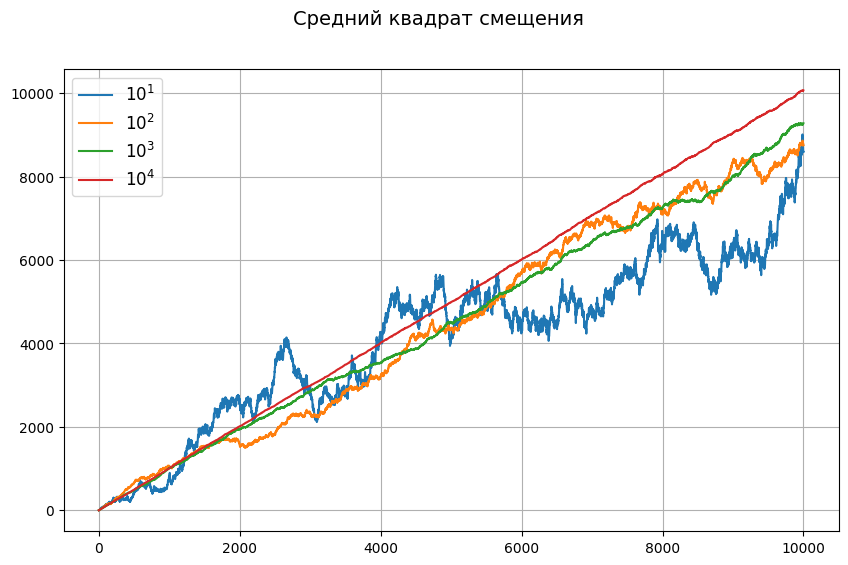

In [113]:
fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Средний квадрат смещения', fontsize=14)

for d, s in zip(data, sizes):
    ax.plot(d.index, d.x, label=f'$10^{np.log10(s[0]):.0f}$')

ax.legend(loc='best', fontsize=12)
ax.grid(True)
plt.show()

## Распределение на N-ом шаге

### Нормальное распределение
Для начала покажу, что на больших N распределение случайных блужданий выходит на нормальное распределение

In [192]:
def quantile(data, transform=np.array):
    data_mean = data.mean()
    data_std = data.std()
    return transform([np.quantile((data - data_mean) / data_std, i / data.shape[0]) for i in range(data.shape[0])])

In [199]:
data = get_data(size=(10000, 1000))
data = data.loc[data.shape[0] - 1]


data_quantile = quantile(data)
normal_quantile = quantile(norm.rvs(size=data.shape))
#data_quantile = [np.quantile((data - data_mean) / data_std, i / data.shape[0]) for i in range(data.shape[0])]

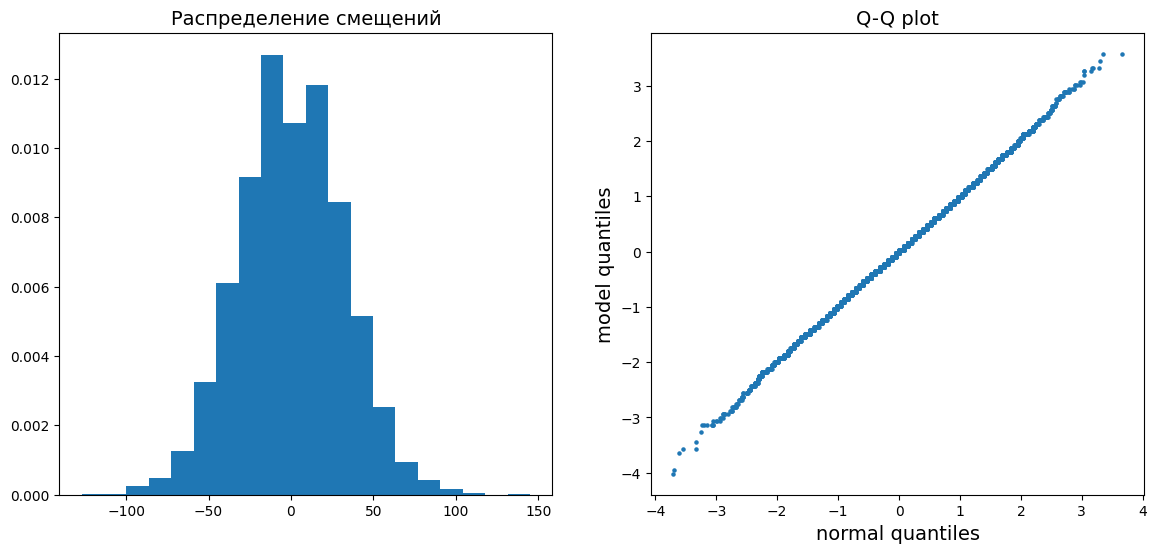

In [201]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].set_title('Распределение смещений', fontsize=14)
ax[1].set_title('Q-Q plot', fontsize=14)
ax[1].set_xlabel('normal quantiles', fontsize=14)
ax[1].set_ylabel('model quantiles', fontsize=14)

ax[0].hist(data, bins=20, density=True)
ax[1].scatter(normal_quantile, data_quantile, s=5, marker='o')

plt.show()

### Зависимость дисперсии распределения от шага

In [202]:
data = get_data(size=(1000, 10000))

data_std = [data.loc[i].std() for i in range(data.shape[0])]

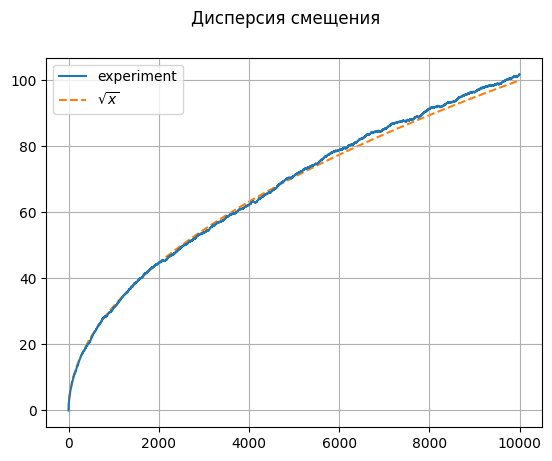

In [216]:
fig, ax = plt.subplots()
fig.suptitle('Дисперсия смещения')

ax.plot(data.index, data_std, label='experiment')

ax.plot(data.index, np.sqrt(data.index), '--', label='$\sqrt{x}$', zorder=0)

ax.grid(True)
ax.legend()
plt.show()